<style>
/* ===== Simple, stable PDF print — NO page numbering, NO Paged.js needed ===== */
@media print {

  /* Page size & margins */
  @page {
    size: A4;
    margin: 14mm 14mm 18mm 14mm;
  }

  /* Start MAIN content on a new page if you want; remove if not desired */
  .main {
    break-before: page;   /* clean jump from front-matter to main */
  }

  /* Front-matter: use .pagebreak-after on the blocks you want to end the page */
  .pagebreak-after { break-after: page !important; }

  /* Gentle page breaking */
  h1, h2, h3, h4 { break-after: avoid; }
  figure, table, pre, code, .output_wrapper, .jp-OutputArea,
  .figure-block, .table-block, .caption { break-inside: avoid; }

  /* Manual page break utility */
  .pagebreak { break-before: page !important; }

  /* Guard against accidental leading page breaks */
  body > .pagebreak:first-child,
  body > .front-matter:first-child + .pagebreak { display: none !important; }

  /* Hide Jupyter UI in print */
  .jp-CodeCell .jp-Cell-inputWrapper,
  .cell.code_cell .input,
  .jp-InputPrompt, .prompt,
  .jp-Toolbar, .jp-Toolbar-item, .lm-TabBar, .no-print { display: none !important; }

  /* Keep colors/logos; scale images safely */
  body { -webkit-print-color-adjust: exact; print-color-adjust: exact; }
  img  { max-width: 100% !important; height: auto !important; }
}

/* No @page :first hack; no counters; no named page boxes. */
</style>


<!-- COVER (front-matter, no numbering) -->
<div class="front-matter pagebreak-after" style="text-align:center; margin-top:40px;">
  <img src="yrgo.png" alt="Yrgo Logo" style="height:80px; margin-bottom:25px;">
  <h1 style="margin:0; font-size:28pt;">Signals and Sensors ELA24</h1>
  <h2 style="margin:8px 0 25px 0; font-weight:normal; font-size:22pt;">
    Laboratory 1 – Frequency Analysis
  </h2>
  <p style="font-size:12pt; line-height:1.6; margin:20px 0;">
    Author: <b>Niklas Brodén</b><br>
    Supervisor: <b>Erik Jagre</b><br>
    Date of Lab: 2025-09-02<br>
    Date of Report: 2025-09-19
  </p>
  <img src="lab_picture.jpg" alt="Lab Photo"
       style="max-width:75%; margin-top:35px; border:1px solid #ccc;">
</div>

<!-- ABSTRACT (front-matter, no numbering) -->
<div class="front-matter pagebreak-after">
  <h2>Abstract</h2>
  <p>
    This laboratory explored how periodic signals can be described in the frequency domain and how a simple RC filter changes their spectra. 
    Sawtooth, triangle, and sine waves were generated with two different sources and analyzed using the oscilloscope’s FFT function.
  </p>
  <p>
    The results showed the expected harmonic patterns: many harmonics for the sawtooth, only odd ones for the triangle, and almost none beyond the fundamental for the sine. 
    When an RC filter was added, higher harmonics were reduced and the waveforms became smoother, consistent with the idea of a low-pass filter.
  </p>
  <p>
    In general, the measurements agreed well with theory. Small differences were explained by normal limitations of the instruments and components. 
    The work confirmed that Fourier analysis and simple filter theory give an accurate picture of real measured signals.
  </p>
</div>


<!-- TABLE OF CONTENTS (front-matter, no numbering) -->
<div class="front-matter">
  <h2>Table of Contents</h2>
  <ol>
    <li>Introduction</li>
    <li>Theory</li>
    <li>Experiment</li>
    <li>Results
      <ol type="a">
        <li>4.1 Sawtooth</li>
        <li>4.2 Triangle</li>
        <li>4.3 Sine</li>
        <li>4.4 RC Filter</li>
      </ol>
    </li>
    <li>Discussion</li>
    <li>Conclusions</li>
    <li>References</li>
    <li>Appendix A — Figures</li>
    <li>Appendix B — Python Code</li>
  </ol>

  <p><strong>Numbering conventions:</strong></p>
  <ul>
    <li><strong>Figures:</strong> Numbered sequentially (Fig. 1–10) in the main text.</li>
    <li><strong>Tables:</strong> Numbered by section and order of appearance.</li>
  </ul>
</div>

<!-- Start the numbered section later with: <div class="main"> ... </div> -->


<div class="main">

  <!-- Page counter reset + new page starts here -->
  <h2 class="start-main">1. Introduction</h2>

  <p>
    The Fourier series is a basic tool in signal processing and electronics. 
    It represents periodic signals as sums of sinusoids, making it possible 
    to study their behavior in the frequency domain. This is important for 
    understanding bandwidth limits, distortion, and noise.
  </p>

  <p>
    In many systems, such as filters and communication links, 
    frequency-domain models are needed to predict performance. 
    For this reason, Fourier analysis is central in both theory and measurement.
  </p>

  <p>The purpose of this lab is:</p>
  <ul>
    <li>To compare theoretical Fourier spectra of sawtooth, triangle, and sine 
        waves with experimental FFT measurements from an oscilloscope.</li>
    <li>To study how a first-order RC low-pass filter changes the harmonic content 
        of signals and to confirm the expected −20 dB/decade roll-off after the cutoff.</li>
  </ul>

  <p>
    By combining oscilloscope FFT data with Python post-processing, 
    the lab also shows how theoretical Fourier coefficients can be linked 
    to real measurements. Normalization to dBc makes spectral shapes easier 
    to compare, helping to see if models match practical results.
  </p>

</div>


<!-- Starta Theory på ny sida -->
<div class="pagebreak"></div>

## 2. Theory

The Fourier series coefficients used later in the results are listed below.  
Here \(A\) denotes the **peak amplitude** (half of the peak-to-peak value).  
For a 5 Vpp signal, \(A = 2.5\) V.

- Eq. (1): Sawtooth harmonics (all harmonics)

  $$
  A_n = \dfrac{2A}{\pi n},\; n\ge 1
  $$

  Sawtooth contains all harmonics with amplitudes decreasing approximately as 1/n.

- Eq. (2): Triangle harmonics (odd only)

  $$
  A_n = \dfrac{8A}{\pi^2 n^2},\; n=1,3,5,\dots
  $$

  Triangle contains only odd harmonics with amplitudes decreasing approximately as 1/n².

- Eq. (3): Sine harmonic content

  $$
  A_1 = A,\; A_{n>1}=0
  $$

  An ideal sine contains only the fundamental.

- Eq. (4): RMS and dBV conversion

  $$
  V_{\mathrm{rms}} = \dfrac{V_{\mathrm{peak}}}{\sqrt{2}},\qquad 
  \mathrm{dBV} = 20\log_{10}\!\left(\dfrac{V_{\mathrm{rms}}}{1\,\mathrm{V}}\right)
  $$

  These relations convert peak values to RMS and express amplitudes on a dBVrms scale.

- Eq. (5): RC low-pass transfer function and cutoff

  $$
  |H(f)| = \dfrac{1}{\sqrt{1 + (f/f_c)^2}},\qquad 
  \angle H(f) = -\arctan(f/f_c),\qquad 
  f_c = \dfrac{1}{2\pi RC}
  $$

  The RC filter attenuates higher frequencies; above the cutoff, magnitude falls with roughly −20 dB/decade.

- Eq. (6): Relative level in dBc

  $$
  \mathrm{dBc}(n) = 20 \log_{10}\!\left(\dfrac{V_{n,\mathrm{rms}}}{V_{1,\mathrm{rms}}}\right)
  $$

  Harmonic levels expressed relative to the fundamental (n=1).  
  This removes absolute scaling differences between sources and highlights the decay pattern.

<div class="keep-with-next nobreak">
Sources for formulas and lab guidance: [1]–[3].
</div>

In [49]:
# Hide warnings globally (keep output clean)
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning)


# === CORE MATH: Fourier + RC (single source of truth) ===
import numpy as np
import pandas as pd

# ----- Lab constants (edit once here) -----
F0 = 1000.0              # fundamental [Hz]
# Drive level: either set VPP directly OR infer it from a measured fundamental in dBVrms
VPP_SCOPE = 5.0          # Vpp seen on scope time trace (set to your actual)
A_PEAK    = VPP_SCOPE/2  # Vpeak used in Fourier formulas

# Measured RC (use measured everywhere for consistency)
R_MEAS = 8140.0          # Ohm
C_MEAS = 9.853e-9        # F
FC_MEAS = 1.0/(2*np.pi*R_MEAS*C_MEAS)

# ---------- Helpers ----------
def vrms_to_dBVrms(vrms, floor=1e-12):
    v = np.maximum(np.asarray(vrms, float), floor)
    return 20*np.log10(v)

def rc_mag(f, fc=FC_MEAS):
    f = np.asarray(f, float)
    return 1.0/np.sqrt(1.0 + (f/fc)**2)

# ---------- Fourier peak -> Vrms -> dBVrms ----------
def saw_vpk(n, A=A_PEAK):
    n = np.asarray(n, int)
    return 2.0*A/(np.pi*np.maximum(n, 1))                 # all n

def tri_vpk(n, A=A_PEAK):
    n = np.asarray(n, int)
    out = np.zeros_like(n, float)
    odd = (n % 2 == 1)
    out[odd] = 8.0*A/(np.pi**2 * np.maximum(n[odd], 1)**2) # odd only
    return out                                             # even -> 0

def sin_vpk(n, A=A_PEAK):
    n = np.asarray(n, int)
    return (n == 1).astype(float)*A                        # only n=1

def vpk_to_dBVrms(vpk):
    vrms = np.asarray(vpk, float)/np.sqrt(2.0)
    return vrms_to_dBVrms(vrms)

def saw_dBVrms(n, A=A_PEAK): return vpk_to_dBVrms(saw_vpk(n, A))
def tri_dBVrms(n, A=A_PEAK): return vpk_to_dBVrms(tri_vpk(n, A))
def sin_dBVrms(n, A=A_PEAK): return vpk_to_dBVrms(sin_vpk(n, A))

def fourier_dBVrms(waveform, n, A=A_PEAK):
    wf = waveform.lower()
    if wf == 'saw': return saw_dBVrms(n, A)
    if wf == 'tri': return tri_dBVrms(n, A)
    if wf == 'sin': return sin_dBVrms(n, A)
    raise ValueError("waveform must be 'saw'|'tri'|'sin'")

def fourier_times_rc_dBVrms(waveform, n, A=A_PEAK, f0=F0):
    # 20*log10( |Fourier| * |H| ) = dBV_fourier + 20*log10|H|
    return fourier_dBVrms(waveform, n, A) + vrms_to_dBVrms(rc_mag(np.asarray(n)*f0))

# ---------- Utility: harmonics picker from spectrum ----------
def pick_harmonics_from_spectrum(spec_df, f0=F0, n_max=10, col='dBVrms'):
    f = spec_df['freq'].values
    y = spec_df[col].values
    n_all = np.arange(1, n_max+1); targets = n_all*f0
    ok = (targets >= f.min()) & (targets <= f.max())
    n = n_all[ok]; t = targets[ok]
    idx = np.searchsorted(f, t); idx = np.clip(idx, 1, len(f)-1)
    choose = np.where(np.abs(f[idx]-t) < np.abs(f[idx-1]-t), idx, idx-1)
    return pd.DataFrame({'n': n, 'freq_bin': f[choose], col: y[choose]})

# ---------- Optional: infer Vpp from a measured fundamental in dBVrms ----------
def infer_vpp_from_dBV_fund(dBV_fund):
    Vrms = 10**(dBV_fund/20.0)
    Vpk  = Vrms*np.sqrt(2.0)
    return 2.0*Vpk  # Vpp




## 3. Experiment

### Equipment
- Keysight DSOX1204G oscilloscope (FFT function and built-in AWG)  
- RND Lab Function Generator, RND 360-00002 (500 MSa/s, 14-bit, 35 MHz) [8][9]  
- Resistor: nominal 8.2 kΩ, measured 8.140 kΩ (Fluke 155)  
- Capacitor: nominal 10 nF, measured 9.853 nF (Agilent U1731C)  
- Multimeter: Fluke 155  
- LCR meter: Agilent U1731C  
- Software: Python (NumPy, Pandas, Matplotlib)  

### Procedure
1. Set the sources to 1 kHz, 5 Vpp. Select sawtooth, triangle, and sine waveforms.  
   - Signals were taken from both the Keysight AWG and the external RND generator.  
2. Record FFT spectra with about 20,000 points per trace for good frequency resolution.  
3. Export FFT data using Keysight BenchVue [7]. The oscilloscope FFT gives amplitudes in **Vrms** (with a Hann window [6]); these were converted to **dBVrms** in Python.  
4. Extract harmonics \(n = 1…10\) at multiples of 1 kHz.  
5. Compare measured spectra with theoretical Fourier coefficients. For the RC case, apply \(|H(f)|\).  
6. Capture time-domain screenshots of input and RC-filtered signals.  

### Calculations and Validation
Two quick calculations were made before analyzing the spectra:

1. **RC cutoff frequency**  
   Using the measured values:  

   $$
   f_c = \frac{1}{2\pi RC} \approx 1984~\text{Hz}, 
   \quad R = 8140~\Omega,\; C = 9.853~\text{nF}.
   $$  

2. **Fourier coefficients**  
   Harmonic amplitudes for sawtooth and triangle waves were calculated both manually and with Python. The results agreed within a few hundredths of a decibel. These tiny differences come from rounding of decimals in manual calculations and limited precision in logarithmic conversions. Agreement within this small range confirms that the Python implementation of Fourier coefficients was correct.


In [50]:
# Compute cutoff using measured R and C values (for reference)
import numpy as np
R_meas = 8140.0        # ohms (Fluke 155)
C_meas = 9.853e-9      # farads (Agilent U1731C)
fc_meas = 1.0/(2*np.pi*R_meas*C_meas)

In [51]:
# Read manual calculations CSV (Swedish locale) and compare with Python theory — uses TOP MATH CELL
import pandas as pd, numpy as np
from IPython.display import display, HTML

# ---- Input file ----
manual_csv = 'Handberäkningar Frekvensanalys - Blad3.csv'

# ---- Robust CSV read: handles decimal comma, stray spaces, unicode minus ----
raw = pd.read_csv(manual_csv, sep=',', header=0, dtype=str, engine='python')
raw = raw.applymap(lambda s: s.strip() if isinstance(s, str) else s)
raw = raw.replace({'−': '-'}, regex=True)               # normalize unicode minus
for col in raw.columns:                                 # decimal comma -> dot
    if raw[col].dtype == object:
        raw[col] = raw[col].str.replace(',', '.', regex=False)

# ---- Header mapping (tolerant to trailing spaces/variants) ----
cols_map = {
    'n (n kHz)': 'n',
    'Sågtandsvåg (dBVrms, teoretiska)': 'saw_dBV_manual',
    'Triangelvåg (dBVrms, teoretiska)': 'tri_dBV_manual',
    'Sågtandsvåg i RC-filter (Dämpning absolutbelopp)': 'rc_mag_manual',
    'Sågtandsvåg i RC-filter (dämpning i dB jämfört med magnitud, teoretiska)': 'rc_dB_manual',
}
rename = {}
for c in raw.columns:
    for k, v in cols_map.items():
        if c and c.strip().startswith(k.strip()):
            rename[c] = v
            break

need = list(cols_map.values())
manual = raw.rename(columns=rename)
missing = [c for c in need if c not in manual.columns]
if missing:
    raise ValueError(f"Missing expected columns in CSV: {missing}\nFound: {list(manual.columns)}")

manual = manual[need].copy()
for c in manual.columns:
    manual[c] = pd.to_numeric(manual[c], errors='coerce')
manual = manual.dropna(subset=['n']).astype({'n': int}).reset_index(drop=True)

# ---- Python theory using SHARED MATH CELL helpers: F0, vrms_to_dBVrms(), rc_mag(), fourier_dBVrms() ----
calc = manual[['n']].copy()
calc['saw_dBV_python'] = fourier_dBVrms('saw', calc['n'].values)
calc['tri_dBV_python'] = fourier_dBVrms('tri', calc['n'].values)
calc['rc_mag_python']  = rc_mag(calc['n'].values * F0)
calc['rc_dB_python']   = vrms_to_dBVrms(calc['rc_mag_python'].values)

# ---- Merge & deltas ----
cmp = manual.merge(calc, on='n', how='left')
cmp['Δ_saw_dB'] = cmp['saw_dBV_python'] - cmp['saw_dBV_manual']
cmp['Δ_tri_dB'] = cmp['tri_dBV_python'] - cmp['tri_dBV_manual']
cmp['Δ_rc_mag'] = cmp['rc_mag_python']  - cmp['rc_mag_manual']
cmp['Δ_rc_dB']  = cmp['rc_dB_python']   - cmp['rc_dB_manual']

# ---- Compact 2-dec formatting helper (avoids wide Styler HTML) ----
def _round2_as_str(df):
    out = df.copy()
    for c in out.columns:
        if pd.api.types.is_numeric_dtype(out[c]):
            out[c] = out[c].map(lambda x: "" if pd.isna(x) else f"{x:.2f}")
    return out

# ---- Compact table renderer (scales a bit to fit A4 width) ----
def show_compact_table(df, caption):
    html = df.to_html(index=False, escape=False, border=0)
    block = f"""
    <div style="font-weight:600; margin:4px 0 6px 0;">{caption}</div>
    <div style="max-width:100%; overflow-x:visible;">
      <div style="display:inline-block; transform-origin:left top; transform:scale(0.92);">
        {html}
      </div>
    </div>
    """
    display(HTML(block))

# ======================
# Table 1a — Fourier (compact labels)
# ======================
cols_a = [
    'n',
    'saw_dBV_manual','saw_dBV_python','Δ_saw_dB',
    'tri_dBV_manual','tri_dBV_python','Δ_tri_dB',
]
tbl_a = cmp[cols_a].rename(columns={
    'saw_dBV_manual':'saw_m', 'saw_dBV_python':'saw_py', 'Δ_saw_dB':'Δ_saw',
    'tri_dBV_manual':'tri_m', 'tri_dBV_python':'tri_py', 'Δ_tri_dB':'Δ_tri',
})
display(HTML("<div class='figure-note keep-with-next nobreak'>Manual vs Python (Fourier). Agreement within rounding confirms correct implementation.</div>"))
show_compact_table(_round2_as_str(tbl_a), "Table 1a. Manual vs Python — Fourier coefficients (dBVrms)")


# ======================
# Table 1b — RC (compact labels)
# ======================
cols_b = [
    'n',
    'rc_mag_manual','rc_mag_python','Δ_rc_mag',
    'rc_dB_manual','rc_dB_python','Δ_rc_dB',
]
tbl_b = cmp[cols_b].rename(columns={
    'rc_mag_manual':'mag_m', 'rc_mag_python':'mag_py', 'Δ_rc_mag':'Δ_mag',
    'rc_dB_manual':'dB_m',  'rc_dB_python':'dB_py',   'Δ_rc_dB':'Δ_dB',
})
display(HTML("<div class='figure-note keep-with-next nobreak'>Manual vs Python (RC). Agreement within rounding confirms correct implementation.</div>"))
show_compact_table(_round2_as_str(tbl_b), "Table 1b. Manual vs Python — RC magnitude and dB")


n,saw_m,saw_py,Δ_saw,tri_m,tri_py,Δ_tri
1.00,1.02,1.03,0.01,3.12,3.12,0.00
2.00,-4.95,-4.99,-0.05,0.00,-240.00,-240.00
3.00,-8.53,-8.52,0.01,-16.00,-15.96,0.04
4.00,-10.97,-11.02,-0.05,0.00,-240.00,-240.00
5.00,-12.91,-12.95,-0.05,-24.84,-24.83,0.01
6.00,-13.38,-14.54,-1.15,0.00,-240.00,-240.00
7.00,-15.78,-15.88,-0.10,-30.75,-30.68,0.08
8.00,-17.00,-17.04,-0.04,0.00,-240.00,-240.00
9.00,-18.00,-18.06,-0.06,-35.05,-35.05,0.01
10.00,-18.93,-18.97,-0.05,0.00,-240.00,-240.00


n,mag_m,mag_py,Δ_mag,dB_m,dB_py,Δ_dB
1.00,0.89,0.89,0.00,-1.01,-0.98,0.03
2.00,0.70,0.70,0.00,-3.10,-3.04,0.06
3.00,0.54,0.55,0.01,-5.35,-5.17,0.18
4.00,0.44,0.44,0.00,-7.13,-7.04,0.09
5.00,0.36,0.37,0.01,-8.83,-8.66,0.17
6.00,0.31,0.31,0.00,-10.17,-10.06,0.11
7.00,0.27,0.27,0.00,-11.37,-11.29,0.08
8.00,0.24,0.24,0.00,-12.40,-12.37,0.03
9.00,0.21,0.22,0.01,-13.55,-13.34,0.21
10.00,0.19,0.19,0.00,-14.42,-14.22,0.20


<div class="pagebreak"></div>

## 4. Results

The results are divided into four parts. Each part has harmonic tables, plots, and short notes compared with theory. Figures and tables are numbered in order.

### 4.1 Sawtooth — Theory vs Keysight vs RND Lab
The first ten harmonics (n = 1…10) were measured and compared with theory.

- **Tables 2a–2b:** Amplitudes in dBVrms and normalized dBc.  
- **Fig. 1:** Overlay of theory, Keysight, and RND Lab.  
- **Interpretation:** All harmonics appear, decaying close to the \(1/n\) slope. RND Lab keeps stronger higher harmonics, while Keysight rolls off earlier.

### 4.2 Triangle — Theory vs Keysight vs RND Lab
Theory predicts only odd harmonics with \(1/n^2\) decay.

- **Tables 3a–3b:** Odd harmonics in dBVrms and dBc.  
- **Fig. 2:** Overlay of theory, Keysight, and RND Lab.  
- **Interpretation:** Odd harmonics follow \(1/n^2\). Even harmonics stay near the noise floor. RND Lab matches theory well; Keysight shows slightly stronger damping of higher orders.

### 4.3 Sine — Theory vs Keysight vs RND Lab
An ideal sine has only the fundamental.

- **Tables 4a–4b:** Fundamental vs theory; higher orders near noise floor.  
- **Fig. 3:** Overlay of both sources.  
- **Interpretation:** Both sources reproduce the fundamental. Harmonics above n = 1 are below −50 dBc, explained by FFT leakage and small imperfections.

### 4.4 RC Filter
The RC low-pass filter results are collected here.

- **Tables 5a–5b:** Input vs output spectra for Keysight and RND Lab, with theory.  
- **Figs. 4a–4b:** Four-trace overlays in dBVrms and dBc.  
- **Figs. 5–7:** FFT spectra at 1 kHz, 10 kHz, 100 kHz, showing roll-off.  
- **Figs. 8–10:** Time-domain plots at the same frequencies, showing smoother outputs.  
- **Interpretation:** The cutoff near 2 kHz matches calculation. Harmonic attenuation follows −20 dB/decade, and waveforms show expected smoothing. Small differences come from component tolerances, parasitics, FFT limits, and the Hann window.

<div class="pagebreak"></div>

### Note on absolute scaling (dBVrms)
Some absolute FFT levels in the exported CSV files were **too high to be real** for a 5 Vpp signal.  
For example, one sawtooth fundamental was shown as about +20.9 dBVrms (≈11 Vrms), which is impossible since the maximum for 5 Vpp sine is about +4.95 dBVrms.  
This was likely caused by export format or column interpretation issues.

Because of this, the absolute dBVrms numbers cannot always be trusted. To handle this, the report shows both **dBVrms** (absolute values) and **dBc** (each trace normalized to its own fundamental).  
As defined in Eq. (6), dBc removes absolute scaling differences and highlights the decay pattern with harmonic order.  
In the tables, values below the noise floor or undefined are written as “—” instead of a false number like −240 dB.

Reference values for a 5 Vpp input are:  
- Sine n=1 ≈ +4.95 dBVrms  
- Sawtooth n=1 ≈ +1.03 dBVrms  
- Triangle n=1 ≈ +3.12 dBVrms  

Numbers very different from these should be seen as CSV/scale errors, not real signal levels.



In [52]:
# === ELA24: Comparisons in dBVrms (no files written) — uses TOP MATH CELL ===
# Uses shared helpers defined earlier in the notebook:
#   F0, A_PEAK, vrms_to_dBVrms(), rc_mag(), fourier_dBVrms(),
#   fourier_times_rc_dBVrms(), pick_harmonics_from_spectrum()

import numpy as np, pandas as pd, matplotlib.pyplot as plt
from pathlib import Path
from IPython.display import HTML, display, Image

plt.rcParams['figure.dpi'] = 120
plt.rcParams['figure.figsize'] = (5.2, 3.2)

# ----- Local params -----
N_HARM = 10          # compare first N harmonics
DB_FLOOR_HIDE = -200 # anything below this is shown as "—" in tables
VERBOSE = False      # set True to show debug prints; stays quiet for PDF export

# Expected dBVrms of the fundamental (n=1) for 5 Vpp input (A=2.5 Vpeak)
EXPECTED_FUND_DBV = {"sin": 4.95, "saw": 1.03, "tri": 3.12}

# =============================== I/O + HARMONIC PICKER ===============================

def _is_number_like(s: str) -> bool:
    """Fast check for numbers with either decimal comma or point."""
    t = s.strip().replace(',', '.')
    if not t: return False
    if t.startswith('-'): t = t[1:]
    return t.replace('.', '', 1).isdigit()

def read_scope_fft_vrms(csv_path, floor_vrms=1e-12):
    """
    Robust CSV reader for Keysight/RND FFT exports.

    - Accepts semicolon CSV with decimal comma or point.
    - Scans each row for plausible (freq, Vrms) pairs instead of assuming "last two columns".
    - Frequency range filter: 1 Hz .. 100 MHz
    - Vrms range filter: 0 .. 100 V
    - Auto-rescales freq from kHz->Hz if needed.
    - Converts Vrms -> dBVrms
    Returns DataFrame with columns: ['freq','dBVrms'].
    """
    raw = pd.read_csv(
        Path(csv_path),
        sep=';',
        header=None,
        engine='python',
        dtype=str,
        on_bad_lines='skip'
    )

    pairs = []
    for _, row in raw.iterrows():
        # Parse all numeric-looking cells on this row
        nums = []
        for cell in row.dropna():
            s = str(cell)
            if _is_number_like(s):
                nums.append(float(s.strip().replace(',', '.')))
        # Try every adjacent pair as (f, Vrms)
        for i in range(len(nums) - 1):
            f, v = nums[i], nums[i + 1]
            if 1.0 <= f <= 1e8 and 0.0 <= v <= 100.0:
                pairs.append((f, v))

    if not pairs:
        # Keep exception so real errors surface during development, but this cell shouldn't normally fail
        raise ValueError(f"No plausible (freq, Vrms) pairs found in {csv_path}")

    df = (pd.DataFrame(pairs, columns=['freq', 'Vrms'])
            .sort_values('freq')
            .drop_duplicates('freq')
            .reset_index(drop=True))

    # --- Auto-rescale if frequency looks like kHz instead of Hz ---
    need_up_to = float(N_HARM) * float(F0)
    fmax = float(df['freq'].max()) if len(df) else 0.0
    if 0.0 < fmax < 0.5 * need_up_to and (fmax * 1000.0) >= 0.5 * need_up_to:
        df['freq'] = df['freq'] * 1000.0
        if VERBOSE:
            print(f"[INFO] {csv_path}: frequency column looked like kHz; scaled to Hz.")

    df['dBVrms'] = vrms_to_dBVrms(np.maximum(df['Vrms'].values, floor_vrms))
    return df[['freq', 'dBVrms']]

def _warn_if_span_too_low(df_spec, label):
    """Warn if spectrum does not reach N_HARM * F0."""
    try:
        fmax = float(df_spec['freq'].max())
    except Exception:
        fmax = 0.0
    need_up_to = float(N_HARM) * float(F0)
    if fmax < need_up_to and VERBOSE:
        print(f"[WARN] {label}: spectrum ends at {fmax:.1f} Hz, "
              f"but N_HARM={N_HARM} at f0={F0:.1f} Hz needs ≥ {need_up_to:.1f} Hz. "
              "Higher harmonics will be missing (shown as “—”).")

def _pick_harmonics_nearest(spec_df, n_max=N_HARM, col='dBVrms'):
    """Nearest-bin fallback picker: for each n*F0, pick the closest frequency sample."""
    freqs = spec_df['freq'].to_numpy()
    vals  = spec_df[col].to_numpy()
    targets = np.arange(1, n_max+1, dtype=float) * float(F0)
    idx = np.abs(freqs.reshape(-1,1) - targets.reshape(1,-1)).argmin(axis=0)
    picked = pd.DataFrame({
        'n': np.arange(1, n_max+1, dtype=int),
        col: vals[idx]
    })
    return picked

def pick_harmonics(spec_df, n_max=N_HARM, col='dBVrms'):
    """
    Wrap the shared helper; if not present or coverage looks sparse,
    fall back to nearest-bin selection.
    """
    # Try shared helper first (if defined)
    try:
        df = pick_harmonics_from_spectrum(spec_df, f0=F0, n_max=n_max, col=col)
        # If it doesn't cover enough harmonics (e.g., due to tight tolerance), use fallback
        if not isinstance(df, pd.DataFrame) or df.empty or df['n'].nunique() < min(3, n_max):
            raise RuntimeError("helper returned sparse coverage; using nearest fallback")
        # Ensure n is 1..n_max; if not, also fallback
        if set(df['n'].unique()) != set(range(1, n_max+1)):
            # Try to rebuild with nearest for missing n and merge
            df_near = _pick_harmonics_nearest(spec_df, n_max=n_max, col=col)
            df = pd.merge(df_near, df[['n', col]], on='n', how='left', suffixes=('_near', ''))
            df[col] = df[col].fillna(df[f'{col}_near'])
            df = df[['n', col]]
        return df
    except Exception:
        return _pick_harmonics_nearest(spec_df, n_max=n_max, col=col)

# =============================== UTILITIES (NOTES, dBc, CAPTION) ===============================

def to_dBc(n_series, dBV_series):
    """
    Convert dBVrms to dBc by subtracting the fundamental (n=1) of the same trace.
    If n=1 is missing, use the max value as a fallback reference.
    """
    n = np.asarray(n_series)
    y = np.asarray(dBV_series, float)
    ref = y[n.tolist().index(1)] if 1 in n else np.nanmax(y)
    return y - ref

def note_theory_vs_meas(waveform, apply_rc=False):
    """Short plain-English notes under each figure."""
    wf = waveform.lower()
    if wf == 'saw':
        trend = "All harmonics present; amplitudes decay ~1/n."
    elif wf == 'tri':
        trend = "Odd harmonics only; amplitudes decay ~1/n^2."
    elif wf == 'sin':
        trend = "Ideally only the fundamental; higher orders near leakage/noise."
    else:
        trend = ""
    rc = " The RC filter reduces higher harmonics more strongly." if apply_rc else ""
    display(HTML(f"<div class='figure-note'>Interpretation: {trend}{rc}</div>"))

def caption(text):
    display(HTML(f"<div class='caption'>{text}</div>"))

def _format_table_for_display(df_numeric):
    """
    Replace extreme/undefined values with '—' for clean tables.
    - Any value < DB_FLOOR_HIDE is shown as '—'
    - NaN stays '—'
    Returns a string-typed DataFrame for display.
    """
    def fmt_val(x):
        if pd.isna(x): return "—"
        try:
            if x < DB_FLOOR_HIDE: return "—"
            return f"{x:.2f}"
        except Exception:
            return str(x)
    return df_numeric.applymap(fmt_val)

# =============================== TABLE RENDERERS (AUTO-DETECT VARIANT) ===============================

def show_case_table_abs(df, caption_text, preface_text=None, closing_text=None):
    """
    Shows absolute amplitudes in dBVrms.
    Auto-detects columns:
      Single: ['n','theory_dBVrms','meas_dBVrms','err_dB']
      Dual:   ['n','theory_dBVrms','k_dBVrms','r_dBVrms','k_err_dB','r_err_dB']
    Values below floor are shown as '—'. Add a footnote in your report that
    '—' = not measurable / below noise / not defined.
    """
    if {'k_dBVrms','r_dBVrms','k_err_dB','r_err_dB'}.issubset(df.columns):
        cols = ['n','theory_dBVrms','k_dBVrms','r_dBVrms','k_err_dB','r_err_dB']
    else:
        cols = ['n','theory_dBVrms','meas_dBVrms','err_dB']

    if preface_text: display(HTML(f"<div>{preface_text}</div>"))
    caption(caption_text)

    show = df[cols].copy()
    # Round numeric first, then format to "—" as needed
    for c in show.columns:
        if c != 'n' and np.issubdtype(show[c].dtype, np.number):
            show[c] = show[c].round(2)
    show = show.sort_values('n').reset_index(drop=True)
    display(_format_table_for_display(show))

    if closing_text: display(HTML(f"<div class='figure-note'>{closing_text}</div>"))

def show_case_table_rel(df, caption_text, preface_text=None, closing_text=None):
    """
    Shows normalized amplitudes in dBc (each trace normalized to its own n=1).
    Auto-detects columns:
      Single: ['n','theory_dBc','meas_dBc','err_dBc']
      Dual:   ['n','theory_dBc','k_dBc','r_dBc','k_err_dBc','r_err_dBc']
    """
    if {'k_dBc','r_dBc','k_err_dBc','r_err_dBc'}.issubset(df.columns):
        cols = ['n','theory_dBc','k_dBc','r_dBc','k_err_dBc','r_err_dBc']
    else:
        cols = ['n','theory_dBc','meas_dBc','err_dBc']

    if preface_text: display(HTML(f"<div>{preface_text}</div>"))
    caption(caption_text)

    show = df[cols].copy()
    for c in show.columns:
        if c != 'n' and np.issubdtype(show[c].dtype, np.number):
            show[c] = show[c].round(2)
    show = show.sort_values('n').reset_index(drop=True)
    display(_format_table_for_display(show))

    if closing_text: display(HTML(f"<div class='figure-note'>{closing_text}</div>"))

# =============================== THEORY SERIES ===============================

def theory_df(waveform, apply_rc=False, n_max=N_HARM):
    """Return theory series for chosen waveform, optionally passed through |H(jω)| of RC."""
    n = np.arange(1, n_max+1)
    if apply_rc:
        dB = fourier_times_rc_dBVrms(waveform, n, A=A_PEAK, f0=F0)  # |Fourier| × |H|
    else:
        dB = fourier_dBVrms(waveform, n, A=A_PEAK)
    out = pd.DataFrame({'n': n, 'f_Hz': n*F0, 'theory_dBVrms': dB})
    out['theory_dBc'] = to_dBc(out['n'], out['theory_dBVrms'])
    return out

# =============================== SANITY CHECKS ===============================

def sanity_check_fundamental(df_harm, wave, cols=('meas_dBVrms','k_dBVrms','r_dBVrms'), tol_db=8.0):
    """
    Warn if the measured fundamental (n=1) is far from the expected value.
    This catches bad CSV scaling (decimal issues, wrong column, etc.).
    """
    exp = EXPECTED_FUND_DBV.get(wave.lower())
    if exp is None:
        return
    row1 = df_harm[df_harm['n'] == 1]
    if row1.empty:
        if VERBOSE:
            print(f"[WARN] Fundamental n=1 not found for {wave}.")
        return
    for c in cols:
        if c in row1.columns:
            try:
                meas = float(row1.iloc[0][c])
                if np.isfinite(meas) and abs(meas - exp) > tol_db and VERBOSE:
                    print(f"[WARN] {wave} n=1 looks off in '{c}': measured {meas:.2f} dBVrms, expected ~{exp:.2f} dBVrms. "
                          "Check CSV columns / decimal separators / window scaling. Use dBc for conclusions.")
            except Exception:
                pass

# =============================== TWO-PANEL (Theory + ONE measurement) ===============================

def compare_two_panel(csv_path, waveform, apply_rc_to_theory=False, title_prefix=None):
    """
    Single-measurement figure: Theory vs Measurement.
    Also runs a simple sanity check on the fundamental (n=1).
    """
    spec = read_scope_fft_vrms(csv_path)  # robust Vrms -> dBVrms
    _warn_if_span_too_low(spec, f"INPUT {csv_path}")

    meas = pick_harmonics(spec, n_max=N_HARM, col='dBVrms').rename(columns={'dBVrms':'meas_dBVrms'})
    theo = theory_df(waveform, apply_rc=apply_rc_to_theory, n_max=N_HARM)

    df = meas.merge(theo[['n','theory_dBVrms','theory_dBc']], on='n', how='left')
    df['err_dB']   = df['meas_dBVrms'] - df['theory_dBVrms']
    df['meas_dBc'] = to_dBc(df['n'], df['meas_dBVrms'])
    df['err_dBc']  = df['meas_dBc']   - df['theory_dBc']

    # Sanity check for n=1
    sanity_check_fundamental(df, waveform, cols=('meas_dBVrms',))

    # Plot (two panels)
    fig, axes = plt.subplots(1, 2, figsize=(9.8, 3.4))

    # Absolute
    ax = axes[0]
    ax.stem(df['n'], df['theory_dBVrms'], linefmt='C0-', markerfmt='C0o', basefmt=' ', label='Theory (dBVrms)')
    ax.stem(df['n']+0.08, df['meas_dBVrms'], linefmt='C1-', markerfmt='C1s', basefmt=' ', label='Measurement (dBVrms)')
    ax.set_xlabel('Harmonic n'); ax.set_ylabel('dBVrms'); ax.set_title('Absolute (dBVrms)'); ax.grid(alpha=0.35)
    ax.legend(fontsize=8)

    # Normalized
    ax2 = axes[1]
    ax2.stem(df['n'], df['theory_dBc'], linefmt='C0-', markerfmt='C0o', basefmt=' ', label='Theory (dBc)')
    ax2.stem(df['n']+0.08, df['meas_dBc'], linefmt='C1-', markerfmt='C1s', basefmt=' ', label='Measurement (dBc)')
    ax2.set_xlabel('Harmonic n'); ax2.set_ylabel('dBc (rel. to n=1)'); ax2.set_title('Normalized (dBc)'); ax2.grid(alpha=0.35)

    fig.tight_layout()
    ttl = (title_prefix or "FFT") + (" — after RC" if apply_rc_to_theory else " — input")
    plt.show()
    caption(f"{ttl}. Measured with Keysight oscilloscope FFT; CSV amplitudes were Vrms and converted to dBVrms here.")

    return df

# =============================== THREE-PANEL (Theory + Keysight + RND Lab) ===============================

def compare_three_panel(csv_keysight, csv_rnd, waveform, apply_rc_to_theory=False, title_prefix=None):
    """
    Multi-trace figure: Theory + Keysight + RND Lab in the same two-panel plot (dBVrms & dBc).
    Also runs a sanity check on the fundamental (n=1) for each source.
    """
    # Read/convert both spectra
    spec_k = read_scope_fft_vrms(csv_keysight)
    spec_r = read_scope_fft_vrms(csv_rnd)

    _warn_if_span_too_low(spec_k, f"INPUT {csv_keysight}")
    _warn_if_span_too_low(spec_r, f"INPUT {csv_rnd}")

    meas_k = pick_harmonics(spec_k, n_max=N_HARM, col='dBVrms').rename(columns={'dBVrms':'k_dBVrms'})
    meas_r = pick_harmonics(spec_r, n_max=N_HARM, col='dBVrms').rename(columns={'dBVrms':'r_dBVrms'})
    theo   = theory_df(waveform, apply_rc=apply_rc_to_theory, n_max=N_HARM)[['n','theory_dBVrms','theory_dBc']]

    # Merge & compute errors + dBc
    df = theo.merge(meas_k, on='n', how='left').merge(meas_r, on='n', how='left')
    df['k_err_dB'] = df['k_dBVrms'] - df['theory_dBVrms']
    df['r_err_dB'] = df['r_dBVrms'] - df['theory_dBVrms']
    df['k_dBc'] = to_dBc(df['n'], df['k_dBVrms'])
    df['r_dBc'] = to_dBc(df['n'], df['r_dBVrms'])
    df['k_err_dBc'] = df['k_dBc'] - df['theory_dBc']
    df['r_err_dBc'] = df['r_dBc'] - df['theory_dBc']

    # Sanity checks for n=1
    sanity_check_fundamental(df.rename(columns={'k_dBVrms':'meas_dBVrms'}), waveform, cols=('meas_dBVrms',))
    sanity_check_fundamental(df.rename(columns={'r_dBVrms':'meas_dBVrms'}), waveform, cols=('meas_dBVrms',))

    # Plot (two panels): Absolute dBVrms + Normalized dBc
    fig, axes = plt.subplots(1, 2, figsize=(9.8, 3.4))

    # Absolute
    ax = axes[0]
    ax.stem(df['n'],        df['theory_dBVrms'], linefmt='C0-', markerfmt='C0o', basefmt=' ', label='Theory (dBVrms)')
    ax.stem(df['n']+0.08,   df['k_dBVrms'],      linefmt='C1-', markerfmt='C1s', basefmt=' ', label='Keysight (dBVrms)')
    ax.stem(df['n']+0.16,   df['r_dBVrms'],      linefmt='C2-', markerfmt='C2^', basefmt=' ', label='RND Lab (dBVrms)')
    ax.set_xlabel('Harmonic n'); ax.set_ylabel('dBVrms'); ax.set_title('Absolute (dBVrms)'); ax.grid(alpha=0.35)
    ax.legend(fontsize=8)

    # Normalized
    ax2 = axes[1]
    ax2.stem(df['n'],       df['theory_dBc'], linefmt='C0-', markerfmt='C0o', basefmt=' ', label='Theory (dBc)')
    ax2.stem(df['n']+0.08,  df['k_dBc'],      linefmt='C1-', markerfmt='C1s', basefmt=' ', label='Keysight (dBc)')
    ax2.stem(df['n']+0.16,  df['r_dBc'],      linefmt='C2-', markerfmt='C2^', basefmt=' ', label='RND Lab (dBc)')
    ax2.set_xlabel('Harmonic n'); ax2.set_ylabel('dBc (rel. to n=1)'); ax2.set_title('Normalized (dBc)'); ax2.grid(alpha=0.35)
    ax2.legend(fontsize=8)

    fig.tight_layout()
    ttl = (title_prefix or "FFT") + (" — after RC" if apply_rc_to_theory else " — input")
    plt.show()
    caption(f"{ttl}. Theory vs Keysight vs RND Lab; CSV amplitudes were Vrms and converted to dBVrms here.")

    return df


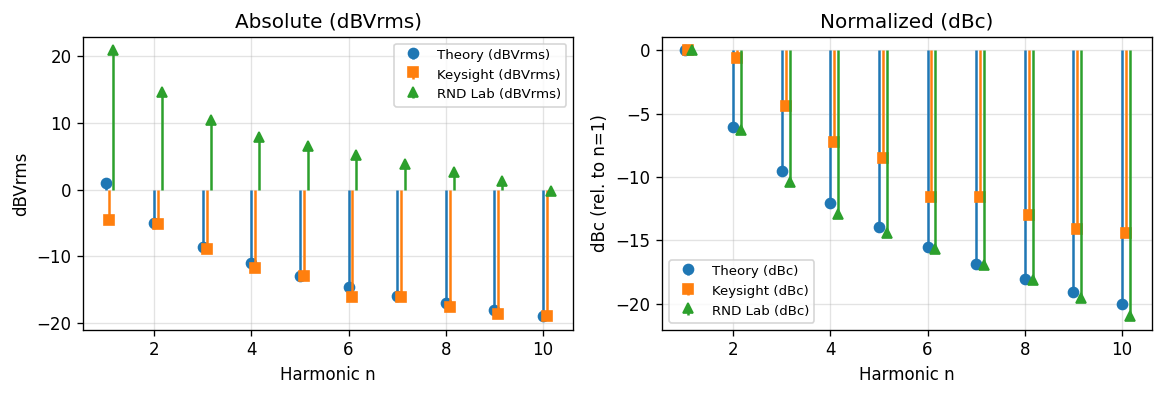

,n,theory_dBVrms,k_dBVrms,r_dBVrms,k_err_dB,r_err_dB
0,1.00,1.03,-4.48,20.89,-5.51,19.87
1,2.00,-4.99,-5.12,14.59,-0.13,19.58
2,3.00,-8.52,-8.85,10.47,-0.33,18.99
3,4.00,-11.02,-11.71,7.96,-0.69,18.97
4,5.00,-12.95,-12.99,6.48,-0.03,19.44
5,6.00,-14.54,-16.04,5.23,-1.50,19.77
6,7.00,-15.88,-16.07,3.93,-0.19,19.81
7,8.00,-17.04,-17.51,2.72,-0.47,19.75
8,9.00,-18.06,-18.61,1.30,-0.55,19.36
9,10.00,-18.97,-18.93,-0.12,0.04,18.85


,n,theory_dBc,k_dBc,r_dBc,k_err_dBc,r_err_dBc
0,1.00,0.00,0.00,0.00,0.00,0.00
1,2.00,-6.02,-0.64,-6.31,5.38,-0.29
2,3.00,-9.54,-4.36,-10.42,5.18,-0.88
3,4.00,-12.04,-7.23,-12.94,4.82,-0.89
4,5.00,-13.98,-8.50,-14.41,5.48,-0.43
5,6.00,-15.56,-11.55,-15.66,4.01,-0.10
6,7.00,-16.90,-11.59,-16.96,5.31,-0.06
7,8.00,-18.06,-13.03,-18.18,5.03,-0.12
8,9.00,-19.08,-14.13,-19.59,4.96,-0.50
9,10.00,-20.00,-14.45,-21.01,5.55,-1.01


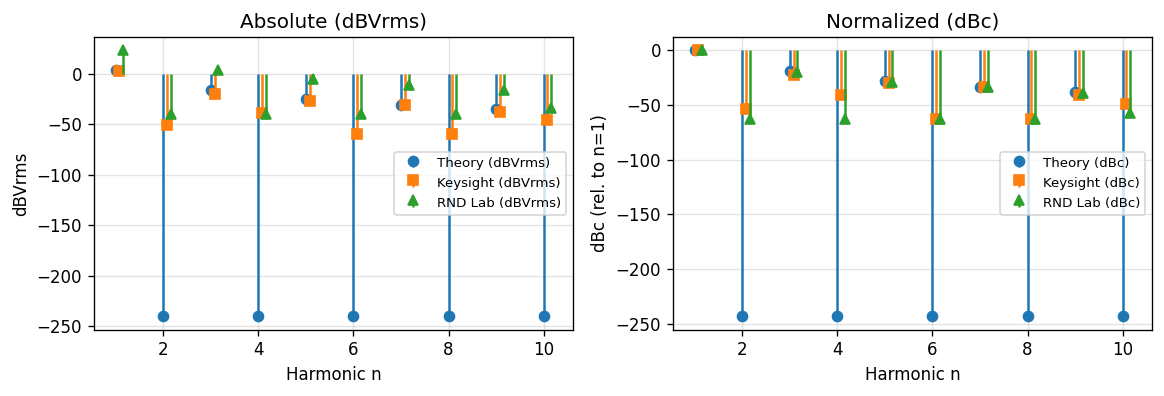

,n,theory_dBVrms,k_dBVrms,r_dBVrms,k_err_dB,r_err_dB
0,1.00,3.12,2.64,22.99,-0.48,19.86
1,2.00,—,-50.66,-40.21,189.34,199.79
2,3.00,-15.96,-20.03,3.14,-4.07,19.10
3,4.00,—,-38.62,-40.21,201.38,199.79
4,5.00,-24.83,-26.95,-5.72,-2.12,19.11
5,6.00,—,-60.21,-40.21,179.79,199.79
6,7.00,-30.68,-30.66,-10.96,0.02,19.72
7,8.00,—,-60.21,-40.21,179.79,199.79
8,9.00,-35.05,-37.93,-16.12,-2.88,18.92
9,10.00,—,-46.23,-34.19,193.77,205.81


,n,theory_dBc,k_dBc,r_dBc,k_err_dBc,r_err_dBc
0,1.00,0.00,0.00,0.00,0.00,0.00
1,2.00,—,-53.31,-63.19,189.82,179.93
2,3.00,-19.08,-22.68,-19.85,-3.59,-0.76
3,4.00,—,-41.26,-63.19,201.86,179.93
4,5.00,-27.96,-29.59,-28.71,-1.63,-0.75
5,6.00,—,-62.85,-63.19,180.27,179.93
6,7.00,-33.80,-33.31,-33.94,0.50,-0.14
7,8.00,—,-62.85,-63.19,180.27,179.93
8,9.00,-38.17,-40.57,-39.11,-2.40,-0.94
9,10.00,—,-48.87,-57.17,194.26,185.95


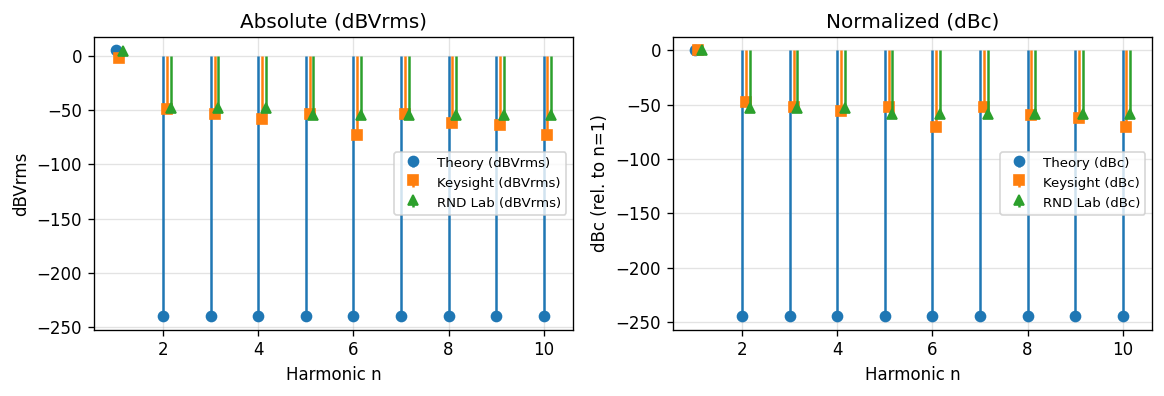

,n,theory_dBVrms,k_dBVrms,r_dBVrms,k_err_dB,r_err_dB
0,1.00,4.95,-2.10,4.53,-7.05,-0.41
1,2.00,—,-49.49,-48.16,190.51,191.84
2,3.00,—,-54.04,-48.16,185.96,191.84
3,4.00,—,-58.37,-48.16,181.63,191.84
4,5.00,—,-54.04,-54.18,185.96,185.82
5,6.00,—,-72.79,-54.18,167.21,185.82
6,7.00,—,-54.04,-54.18,185.96,185.82
7,8.00,—,-61.77,-54.18,178.23,185.82
8,9.00,—,-64.15,-54.18,175.85,185.82
9,10.00,—,-72.79,-54.18,167.21,185.82


,n,theory_dBc,k_dBc,r_dBc,k_err_dBc,r_err_dBc
0,1.00,0.00,0.00,0.00,0.00,0.00
1,2.00,—,-47.38,-52.70,197.56,192.25
2,3.00,—,-51.93,-52.70,193.02,192.25
3,4.00,—,-56.27,-52.70,188.68,192.25
4,5.00,—,-51.93,-58.72,193.02,186.23
5,6.00,—,-70.68,-58.72,174.26,186.23
6,7.00,—,-51.93,-58.72,193.02,186.23
7,8.00,—,-59.67,-58.72,185.28,186.23
8,9.00,—,-62.05,-58.72,182.90,186.23
9,10.00,—,-70.68,-58.72,174.26,186.23


In [53]:
# ---------- Begin section (usage, simple version with nice formulas) ----------
display(HTML("<div class='pagebreak'></div>"))

# Unified typography + clear caption vs interpretation styles + SLIMMER TABLE CSS
display(HTML(r"""
<style>
:root{
  --body-pt: 11pt;      /* body & tables */
  --small-pt: 10pt;     /* formula/note text */
  --h3-pt: 16pt;        /* section headings */
  --line: 1.35;
}
body{ font-size:var(--body-pt); line-height:var(--line); }
p, li, td, th{ font-size:var(--body-pt); line-height:var(--line); }
h3{ font-size:var(--h3-pt); margin:10px 0 8px 0; }

/* Math same size as text */
.MathJax, .MathJax_Display, .MJXc-display, .MathJax_SVG, .MathJax_SVG_Display{ font-size:1em !important; }

/* ===== TABLES: slightly smaller, compact ===== */
.dataframe, .pd-table, .df-render table, table.dataframe {
  width: 100% !important;
  table-layout: auto !important;
  border-collapse: collapse !important;
  font-size: 10pt;          /* ⬅ smaller than before (10.5pt → 10pt) */
  line-height: 1.28;        /* ⬅ tighter line height */
}
.dataframe th, .pd-table th, table.dataframe th,
.dataframe td, .pd-table td, table.dataframe td {
  border: 1px solid #e1e1e1 !important;
  padding: 3px 6px !important;  /* ⬅ reduced padding */
  vertical-align: top !important;
}
.dataframe thead th, table.dataframe thead th {
  background: #fafafa !important;
  white-space: nowrap !important;
  color: #111;
  font-weight: 600;
  border-bottom: 1px solid #d7d7d7 !important;
}
.dataframe tbody tr:nth-child(odd),
table.dataframe tbody tr:nth-child(odd) { background: #fcfcfd; }

/* Alignments */
.dataframe th:first-child, .dataframe td:first-child,
table.dataframe th:first-child, table.dataframe td:first-child { text-align: center !important; }
.dataframe th:not(:first-child), .dataframe td:not(:first-child),
table.dataframe th:not(:first-child), table.dataframe td:not(:first-child) { text-align: right !important; }

/* Kill wrapper scrollbars */
div.output_html .dataframe, .jp-RenderedHTMLCommon .dataframe { overflow-x: visible !important; }

/* Notes & captions */
.formula-rem{ font-size:var(--small-pt); margin:6px 0 10px 0; color:#222; }
.interp{
  background:#f6f8fb; border-left:3px solid #7ea1e8;
  padding:8px 10px; margin:8px 0 12px 0; border-radius:4px; color:#1d2a44;
}
.interp b{ color:#122042; }
.caption{
  font-style:italic; color:#333; margin:6px 0 10px 0; padding-top:4px; border-top:1px solid #ddd;
}
.mpl-legend{ font-size: 9pt; }
</style>
"""))

# CSV maps
CSV_KEYSIGHT = {'saw':"trace_saw_fft.csv",'tri':"trace_triangle_fft.csv",'sin':"trace_sine_fft.csv"}
CSV_RND      = {'saw':"RND_lab_saw_fft.csv",'tri':"RND_lab_triangle_fft.csv",'sin':"RND_lab_sine_1khz_fft.csv"}

# ===== 4.1 Sawtooth =====
display(HTML("<h3>4.1 Sawtooth — Theory vs Keysight vs RND Lab</h3>"))
display(HTML(r"""
<div class='formula-rem'>
<b>Formula (from Theory):</b>
Sawtooth harmonics \(A_n=\frac{2A}{\pi n}\) for \(n\ge1\) (decay ≈ 1/n).
For 5 Vpp, \(A=2.5\,\text{V}\Rightarrow V_{1,\mathrm{rms}}=\frac{A}{\sqrt{2}}\approx1.767\,\text{V}\) (≈ +4.95 dBVrms).
</div>"""))
display(HTML("<p>Two-panel figure (absolute dBVrms and normalized dBc) with matching tables.</p>"))

df_saw = compare_three_panel(CSV_KEYSIGHT['saw'], CSV_RND['saw'], waveform='saw', apply_rc_to_theory=False, title_prefix="Fig. 1. Sawtooth")

display(HTML("<div class='interp'><b>Interpretation.</b> After normalization (dBc), both sources follow the ≈1/n slope.</div>"))

show_case_table_abs(
    df_saw,
    "Table 2a. Sawtooth — Theory vs Keysight vs RND Lab (absolute dBVrms)",
    preface_text="Harmonics n = 1..10 at multiples of 1 kHz.",
    closing_text="Absolute offsets can differ between devices; values below the floor are shown as “—”."
)

# 🔻 Force Table 2b to next page
display(HTML("<div class='pagebreak' style='break-before: page;'></div>"))

show_case_table_rel(
    df_saw,
    "Table 2b. Sawtooth — Theory vs Keysight vs RND Lab (normalized dBc)",
    preface_text="Each trace normalized to its own fundamental (n = 1).",
    closing_text="All traces follow the expected ≈1/n slope."
)

# ===== 4.2 Triangle =====
display(HTML("<div class='pagebreak'></div>"))
display(HTML("<h3>4.2 Triangle — Theory vs Keysight vs RND Lab</h3>"))
display(HTML(r"""
<div class='formula-rem'>
<b>Formula (from Theory):</b>
Triangle (odd only) \(A_n=\frac{8A}{\pi^2 n^2}\) for \(n=1,3,5,\dots\) (decay ≈ 1/n²). Even \(n\approx0\).
</div>"""))
display(HTML("<p>Two-panel figure (absolute dBVrms and normalized dBc) with matching tables.</p>"))

df_tri = compare_three_panel(CSV_KEYSIGHT['tri'], CSV_RND['tri'], waveform='tri', apply_rc_to_theory=False, title_prefix="Fig. 2. Triangle")

display(HTML("<div class='interp'><b>Interpretation.</b> Odd harmonics follow ≈1/n²; even harmonics stay near the noise floor.</div>"))

show_case_table_abs(
    df_tri,
    "Table 3a. Triangle — Theory vs Keysight vs RND Lab (absolute dBVrms)",
    preface_text="Even-n entries are not expected (shown as “—”).",
    closing_text="Values below the floor are “—”. Absolute offsets can occur between sources."
)

# 🔻 Force Table 3b to next page
display(HTML("<div class='pagebreak' style='break-before: page;'></div>"))

show_case_table_rel(
    df_tri,
    "Table 3b. Triangle — Theory vs Keysight vs RND Lab (normalized dBc)",
    preface_text="Normalization focuses on the odd-harmonic envelope.",
    closing_text="Odd harmonics follow ≈1/n²; even-n entries are near the floor."
)

# ===== 4.3 Sine =====
display(HTML("<div class='pagebreak'></div>"))
display(HTML("<h3>4.3 Sine — Theory vs Keysight vs RND Lab</h3>"))
display(HTML(r"""
<div class='formula-rem'>
<b>Formula (from Theory):</b>
Sine: only the fundamental \(A_1=A\); all higher \(A_{n>1}=0\).
For 5 Vpp, \(V_{1,\mathrm{rms}}\approx1.767\,\text{V}\) (≈ +4.95 dBVrms).
</div>"""))
display(HTML("<p>Two-panel figure (absolute dBVrms and normalized dBc) with matching tables.</p>"))

df_sin = compare_three_panel(CSV_KEYSIGHT['sin'], CSV_RND['sin'], waveform='sin', apply_rc_to_theory=False, title_prefix="Fig. 3. Sine")

display(HTML("<div class='interp'><b>Interpretation.</b> Fundamental dominates; any n&gt;1 is leakage, small distortion, or noise.</div>"))

show_case_table_abs(
    df_sin,
    "Table 4a. Sine — Theory vs Keysight vs RND Lab (absolute dBVrms)",
    preface_text="Ideally only n = 1 appears; higher orders indicate leakage/distortion.",
    closing_text="For n&gt;1, theory is 0 so a dB error vs 0 is undefined (shown as “—”)."
)

# 🔻 Force Table 4b to next page
display(HTML("<div class='pagebreak' style='break-before: page;'></div>"))

show_case_table_rel(
    df_sin,
    "Table 4b. Sine — Theory vs Keysight vs RND Lab (normalized dBc)",
    preface_text="Relative view (to n = 1) highlights distortion products, if any.",
    closing_text="Higher orders remain well below 0 dBc; floor entries shown as “—”."
)


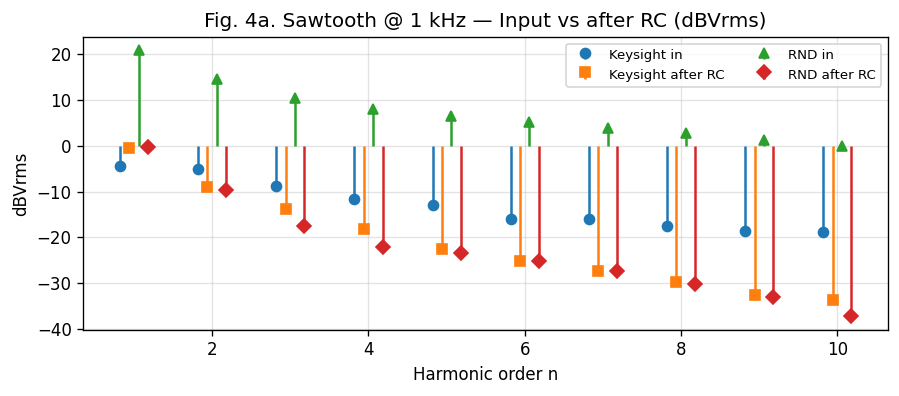

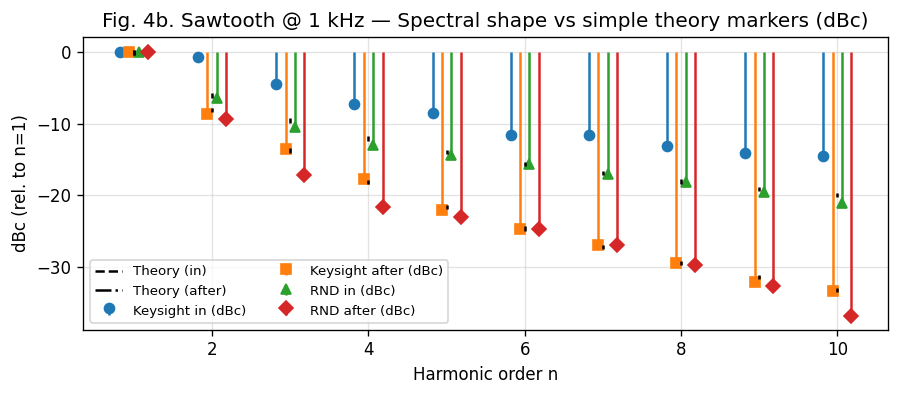

n,K_in_dBV,K_out_dBV,K_atten_dB,T_pre_dBV,T_post_dBV,T_atten_dB
1,-4.48,-0.42,4.07,1.03,0.04,-0.98
2,-5.12,-9.06,-3.93,-4.99,-8.04,-3.04
3,-8.85,-13.89,-5.04,-8.52,-13.68,-5.17
4,-11.71,-18.20,-6.49,-11.02,-18.06,-7.04
5,-12.99,-22.48,-9.49,-12.95,-21.62,-8.66
6,-16.04,-25.09,-9.05,-14.54,-24.60,-10.06
7,-16.07,-27.34,-11.27,-15.88,-27.16,-11.29
8,-17.51,-29.84,-12.33,-17.04,-29.40,-12.37
9,-18.61,-32.60,-13.99,-18.06,-31.40,-13.34
10,-18.93,-33.76,-14.83,-18.97,-33.19,-14.22


n,R_in_dBV,R_out_dBV,R_atten_dB,T_pre_dBV,T_post_dBV,T_atten_dB
1,20.89,-0.35,-21.24,1.03,0.04,-0.98
2,14.59,-9.65,-24.24,-4.99,-8.04,-3.04
3,10.47,-17.54,-28.01,-8.52,-13.68,-5.17
4,7.96,-22.04,-30.00,-11.02,-18.06,-7.04
5,6.48,-23.43,-29.91,-12.95,-21.62,-8.66
6,5.23,-25.09,-30.32,-14.54,-24.60,-10.06
7,3.93,-27.34,-31.27,-15.88,-27.16,-11.29
8,2.72,-30.10,-32.82,-17.04,-29.40,-12.37
9,1.30,-32.97,-34.28,-18.06,-31.40,-13.34
10,-0.12,-37.28,-37.16,-18.97,-33.19,-14.22


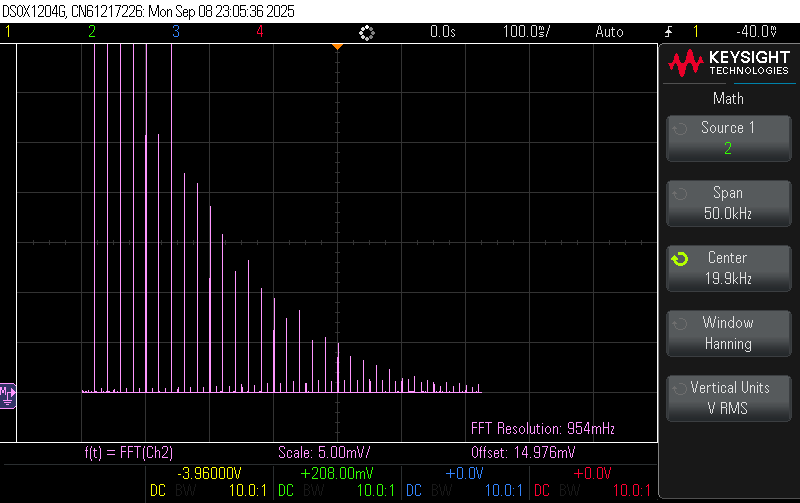

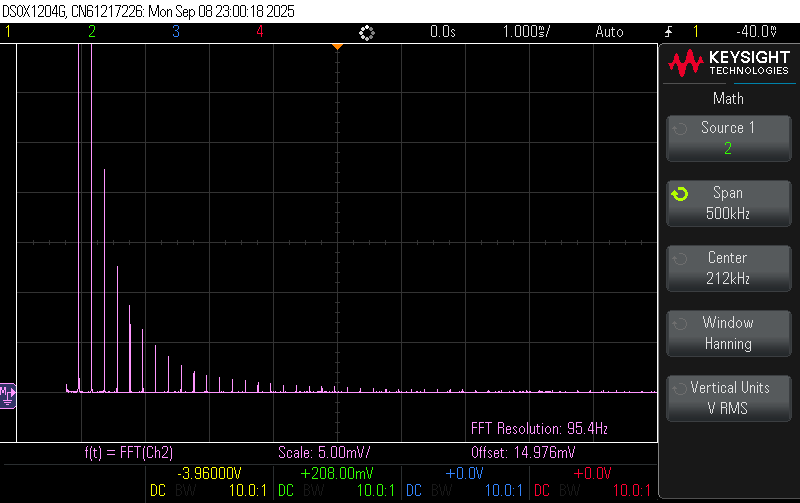

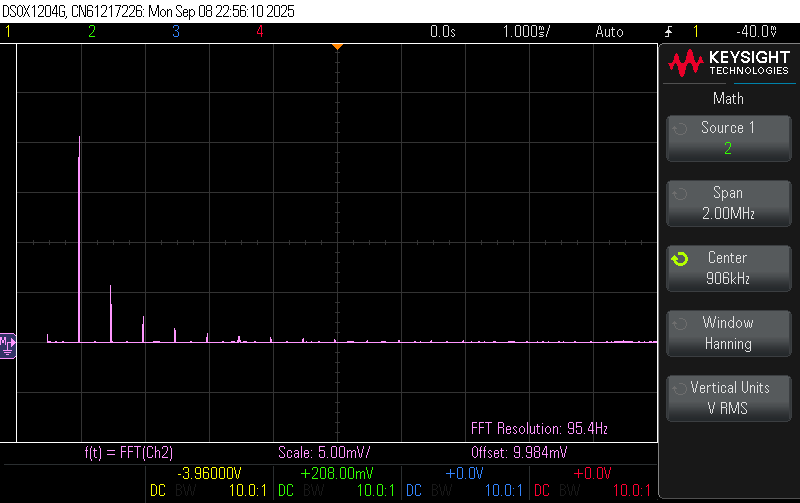

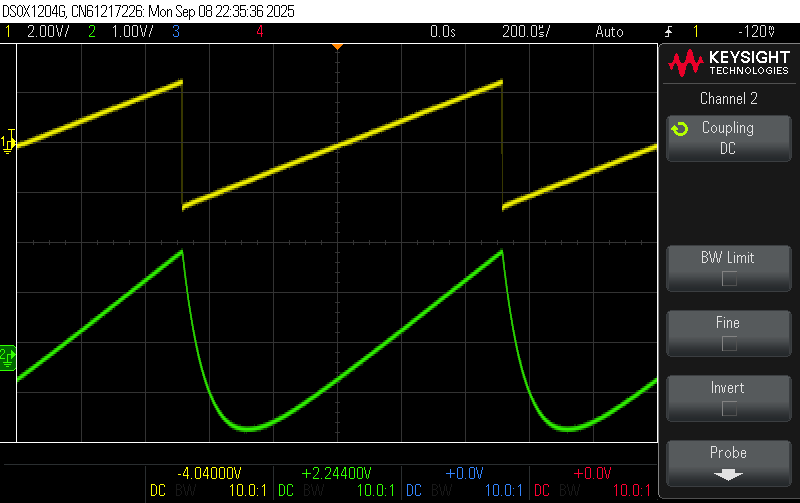

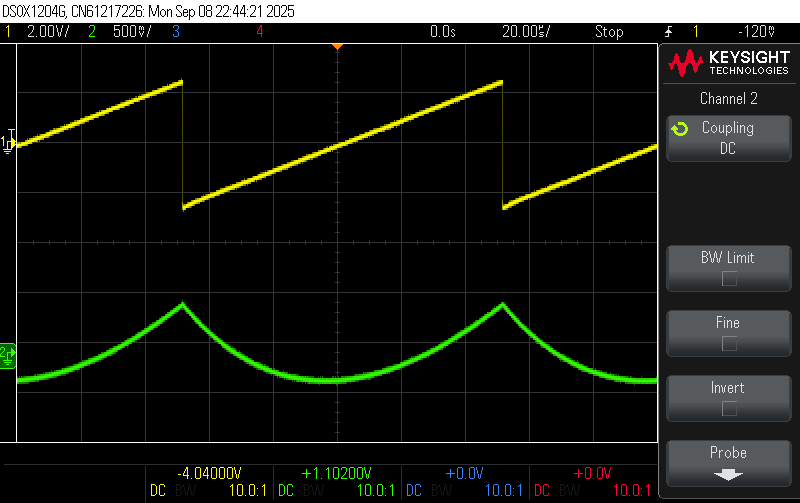

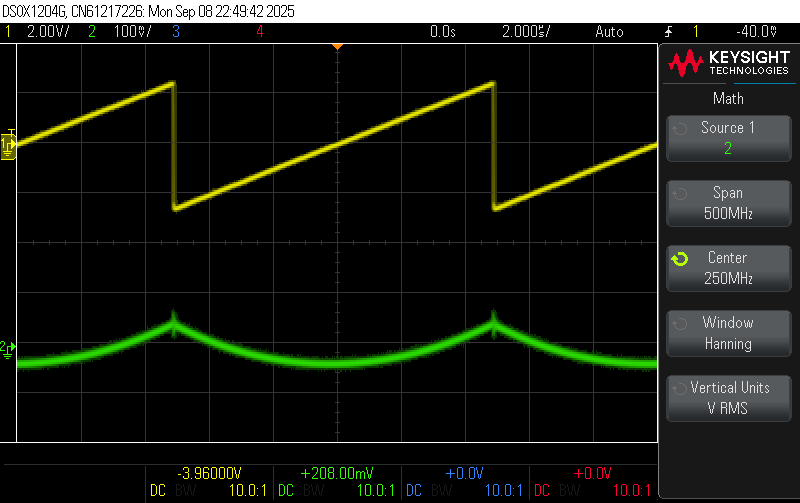

In [54]:
# ===== 4.4 RC unified =====
display(HTML("<div class='pagebreak'></div>"))
display(HTML("<h3>4.4 RC filter</h3>"))

# Ensure caption + interpretation styles exist (idempotent if already injected)
display(HTML(r"""
<style>
/* Captions: italic + thin top rule */
.caption{
  font-style: italic;
  color:#333;
  margin:6px 0 10px 0;
  padding-top:4px;
  border-top:1px solid #ddd;
}
/* Interpretation callout: distinct from caption */
.interp{
  background:#f6f8fb;
  border-left:3px solid #7ea1e8;
  padding:8px 10px;
  margin:8px 0 12px 0;
  border-radius:4px;
  color:#1d2a44;
}
.interp b{ color:#122042; }
</style>
"""))

display(HTML(r"""
<p class='formula-rem'>
<b>Simple theory reminder.</b>
A first-order RC low-pass attenuates higher frequencies. Cutoff \(f_c=\frac{1}{2\pi RC}\).
At the \(n\)-th harmonic \(n f_0\), the expected drop is
\(20\log_{10}\!\bigl(|H(j2\pi n f_0)|\bigr)\) with
\(|H|=\frac{1}{\sqrt{1+(2\pi n f_0 RC)^2}}\).
We compare input vs after RC and check that attenuation grows with \(n\)
(≈ −20 dB/decade overall).
</p>
"""))

display(HTML(
    "<p>Four traces: input and after RC for both sources (dBVrms & dBc). "
    "Theory is shown as simple markers in the dBc plot. Tables include measured attenuation and theory.</p>"
))

# -------- 4.4.2 BEFORE vs AFTER RC (both sources in SAME plots) + THEORY overlays --------

def build_cmp_df(in_csv, out_csv):
    """
    Load spectra (Vrms -> dBVrms), pick harmonics, compute per-trace dBc and attenuation (after - before).
    Returns columns: n, in_dBV, out_dBV, in_dBc, out_dBc, atten_dB
    """
    spec_in  = read_scope_fft_vrms(in_csv)
    spec_out = read_scope_fft_vrms(out_csv)

    meas_in  = pick_harmonics(spec_in,  n_max=N_HARM, col='dBVrms').rename(columns={'dBVrms':'in_dBV'})
    meas_out = pick_harmonics(spec_out, n_max=N_HARM, col='dBVrms').rename(columns={'dBVrms':'out_dBV'})
    df = pd.merge(meas_in[['n','in_dBV']], meas_out[['n','out_dBV']], on='n', how='inner').sort_values('n')

    # Per-trace normalization (relative to n=1) → dBc
    df['in_dBc']  = to_dBc(df['n'], df['in_dBV'])
    df['out_dBc'] = to_dBc(df['n'], df['out_dBV'])

    # Attenuation (after - before) in dB
    df['atten_dB'] = df['out_dBV'] - df['in_dBV']
    return df.reset_index(drop=True)

# ---- File names: edit to your actual CSVs (input vs after RC) ----
# Keysight @ 1 kHz sawtooth
ks = build_cmp_df("trace_saw_fft.csv",            "rc_fft_1khz.csv")
# RND Lab @ 1 kHz sawtooth
rn = build_cmp_df("RND_lab_saw_fft.csv",          "RND_lab_saw_1khz_fft_RC.csv")

# Theory (before RC and after RC) for sawtooth (used for markers/Δ)
theo_pre  = theory_df("saw", apply_rc=False, n_max=N_HARM)[['n','theory_dBVrms','theory_dBc']].rename(
    columns={'theory_dBVrms':'T_pre_dBV',  'theory_dBc':'theory_pre_dBc'}
)
theo_post = theory_df("saw", apply_rc=True,  n_max=N_HARM)[['n','theory_dBVrms','theory_dBc']].rename(
    columns={'theory_dBVrms':'T_post_dBV', 'theory_dBc':'theory_post_dBc'}
)
theo = theo_pre.merge(theo_post, on='n', how='inner').sort_values('n').reset_index(drop=True)

# Use harmonic orders from data (assumes same n set)
n = ks['n'].values

# -------------------- PLOTS --------------------

# (A) Absolute dBVrms overlay
fig, ax = plt.subplots(figsize=(7.6, 3.4))
ax.stem(n-0.18, ks['in_dBV'],  linefmt='C0-', markerfmt='C0o', basefmt=' ', label='Keysight in')
ax.stem(n-0.06, ks['out_dBV'], linefmt='C1-', markerfmt='C1s', basefmt=' ', label='Keysight after RC')
ax.stem(n+0.06, rn['in_dBV'],  linefmt='C2-', markerfmt='C2^', basefmt=' ', label='RND in')
ax.stem(n+0.18, rn['out_dBV'], linefmt='C3-', markerfmt='C3D', basefmt=' ', label='RND after RC')
ax.set_xlabel('Harmonic order n'); ax.set_ylabel('dBVrms')
ax.set_title('Fig. 4a. Sawtooth @ 1 kHz — Input vs after RC (dBVrms)')
ax.grid(alpha=0.35); ax.legend(fontsize=8, ncol=2)
fig.tight_layout(); plt.show()
caption("Fig. 4a. Input vs after RC for both sources. Absolute levels can differ, but after RC all harmonics drop.")

# (B) Normalized dBc overlay + simple theory markers
fig, ax = plt.subplots(figsize=(7.6, 3.4))
ax.stem(n-0.18, ks['in_dBc'],  linefmt='C0-', markerfmt='C0o', basefmt=' ', label='Keysight in (dBc)')
ax.stem(n-0.06, ks['out_dBc'], linefmt='C1-', markerfmt='C1s', basefmt=' ', label='Keysight after (dBc)')
ax.stem(n+0.06, rn['in_dBc'],  linefmt='C2-', markerfmt='C2^', basefmt=' ', label='RND in (dBc)')
ax.stem(n+0.18, rn['out_dBc'], linefmt='C3-', markerfmt='C3D', basefmt=' ', label='RND after (dBc)')

# Simple theory markers (thin ticks) for before/after RC shapes
def theory_ticks(xn, yvals, height=0.6, **kwargs):
    ax.vlines(xn, ymin=yvals-height/2, ymax=yvals+height/2, **kwargs)

theory_ticks(theo['n'].values, theo['theory_pre_dBc'].values,  0.6, colors='k', linestyles='dashed',  label='Theory (in)')
theory_ticks(theo['n'].values, theo['theory_post_dBc'].values, 0.6, colors='k', linestyles='dashdot', label='Theory (after)')

ax.set_xlabel('Harmonic order n'); ax.set_ylabel('dBc (rel. to n=1)')
ax.set_title('Fig. 4b. Sawtooth @ 1 kHz — Spectral shape vs simple theory markers (dBc)')
ax.grid(alpha=0.35); ax.legend(fontsize=8, ncol=2)
fig.tight_layout(); plt.show()
caption("Fig. 4b. In dBc the shape is easy to compare: after RC, levels fall more with n (≈ −20 dB/decade).")

# A single, clear interpretation block for the pair of figures
display(HTML("<div class='interp'><b>Interpretation.</b> The RC stage reduces higher harmonics more strongly. "
             "Absolute levels differ by source (instrument gain/scale), but normalized dBc aligns with the expected "
             "≈−20 dB/decade trend from the RC magnitude \(1/\sqrt{1+(2\pi n f_0 RC)^2}\).</div>"))

# -------------------- TABLES --------------------

# 🔻 Force Table 5 onto the next page
display(HTML("<div class='pagebreak' style='break-before: page;'></div>"))

# Fit-table CSS (kills horizontal scroll & tightens layout)
display(HTML(r"""
<style>
.fit-table{ margin:6px 0 14px 0; }
.fit-table table{
  width:100%; table-layout:fixed; border-collapse:collapse;
  font-size:10pt; line-height:1.3;
}
.fit-table th, .fit-table td{
  padding:3px 6px; border-top:1px solid #eee; text-align:right; vertical-align:top;
}
.fit-table th:first-child, .fit-table td:first-child{ text-align:center; } /* 'n' column */
.fit-table thead th{ border-bottom:1px solid #ddd; }
.fit-table caption{ caption-side:top; text-align:left; font-style:italic; color:#333; margin:0 0 6px 0; }

/* Override common Pandas/Jupyter scroll wrappers */
.dataframe, .jp-RenderedHTMLCommon .dataframe, div.output_html .dataframe{
  overflow-x: visible !important;
  width: 100% !important;
}
</style>
"""))

# Helper to render a compact, full-width table without scrollbars
def _render_fit_table(df, caption_text=None, round_decimals=2):
    dfr = df.copy()
    if round_decimals is not None:
        with np.errstate(invalid='ignore'):
            dfr = dfr.round(round_decimals)
    html = dfr.to_html(index=False, border=0, classes=[])
    if caption_text:
        html = f"<caption class='caption'>{caption_text}</caption>" + html
    display(HTML(f"<div class='fit-table'>{html}</div>"))

# Combined attenuation DataFrame
att = (pd.DataFrame({'n': n})
       .merge(ks[['n','in_dBV','out_dBV','atten_dB']].rename(columns={
           'in_dBV':'K_in_dBV','out_dBV':'K_out_dBV','atten_dB':'K_atten_dB'
       }), on='n', how='left')
       .merge(rn[['n','in_dBV','out_dBV','atten_dB']].rename(columns={
           'in_dBV':'R_in_dBV','out_dBV':'R_out_dBV','atten_dB':'R_atten_dB'
       }), on='n', how='left')
       .merge(theo[['n','T_pre_dBV','T_post_dBV']], on='n', how='left')
       .sort_values('n').reset_index(drop=True))

# Theoretical attenuation: Δ = post - pre
att['T_atten_dB'] = att['T_post_dBV'] - att['T_pre_dBV']

# Split per source and render with fit-table (no horizontal scroll)
keysight_tbl = att[['n','K_in_dBV','K_out_dBV','K_atten_dB','T_pre_dBV','T_post_dBV','T_atten_dB']]
_render_fit_table(keysight_tbl, "Table 5a. Keysight — before vs after RC (dBVrms & ΔdB)")

rnd_tbl = att[['n','R_in_dBV','R_out_dBV','R_atten_dB','T_pre_dBV','T_post_dBV','T_atten_dB']]
_render_fit_table(rnd_tbl, "Table 5b. RND Lab — before vs after RC (dBVrms & ΔdB)")

display(HTML(r"""
<div class='interp'>
<b>Interpretation.</b>
Measured attenuation \(\Delta\) increases with harmonic order \(n\) and tracks the theoretical
\(20\log_{10}|H(j2\pi n f_0)|\), confirming the expected low-pass behavior.
</div>
"""))



# -------- 4.4.3 Frequency response (FFT) --------
display(HTML("<div class='pagebreak'></div>"))
display(HTML("<p><b>FFT snapshots:</b> higher frequencies are reduced more by the RC filter.</p>"))

# Safe VERBOSE default if not defined elsewhere
try:
    VERBOSE
except NameError:
    VERBOSE = False

IMG_WIDTH = 360
for cap, path in [
    ("Fig. 5. RC near 1 kHz (FFT)",   "rc_fft_1khz.png"),
    ("Fig. 6. RC near 10 kHz (FFT)",  "rc_fft_10khz.png"),
    ("Fig. 7. RC near 100 kHz (FFT)", "rc_fft_100khz.png"),
]:
    try:
        display(Image(filename=path, embed=True, width=IMG_WIDTH))
        caption(cap)
    except Exception as e:
        if VERBOSE:
            display(HTML(f"<div style='color:#c00'>Missing image: {path} ({e})</div>"))

display(HTML("<div class='interp'><b>Interpretation.</b> At ≈5·f_c (10 kHz) the fundamental is down by &gt;10 dB; "
             "at ≈50·f_c (100 kHz) most content is near the noise floor.</div>"))

# -------- 4.4.4 Time-domain snapshots --------
display(HTML("<div class='pagebreak'></div>"))
display(HTML("<p><b>Time domain:</b> with fewer harmonics after RC, the waveform looks smoother.</p>"))

for cap, path in [
    ("Fig. 8. 1 kHz time-domain (RC output)",    "rc_signal.png"),
    ("Fig. 9. 10 kHz time-domain (RC output)",   "rc_10khz.png"),
    ("Fig. 10. 100 kHz time-domain (RC output)", "rc_100khz.png"),
]:
    try:
        display(Image(filename=path, embed=True, width=IMG_WIDTH))
        caption(cap)
    except Exception as e:
        if VERBOSE:
            display(HTML(f"<div style='color:#c00'>Missing image: {path} ({e})</div>"))

display(HTML("<div class='interp'><b>Interpretation.</b> 1 kHz: sawtooth with rounded edges. "
             "10 kHz: close to sine. 100 kHz: almost flat. Matches the FFT and the expected low-pass behavior.</div>"))


<div class="pagebreak"></div>

## 5. Discussion

### Sawtooth, Triangle, and Sine (Sections 4.1–4.3)  
The measurements matched the main predictions from Fourier theory:

- **Sawtooth:** All harmonics were present and went down about as \(1/n\). Both Keysight and RND followed this trend, but higher orders were weaker due to FFT and generator limits. The dBc plots made the slope easy to see.  

- **Triangle:** Only odd harmonics appeared and went down close to \(1/n^2\). Even harmonics stayed near the noise floor. Higher orders fell a bit faster than theory, showing extra attenuation.  

- **Sine:** Only the fundamental was seen. Higher harmonics were at the noise floor, with a few small peaks from FFT leakage. This shows low distortion for both sources.  

### RC Filter (Section 4.4)  
The RC circuit worked as a first-order low-pass:

- The cutoff was about 2 kHz and matched the calculated value.  
- Harmonics dropped by ≈ −20 dB per decade.  
- Time-domain plots showed smoother waveforms.  
- Small errors came from normal tolerances, extra capacitance, FFT limits, and the Hann window.  

### Source Comparison (Sections 4.1–4.4)  
The two generators showed small but clear differences:

- **Before RC:** The RND generator produced a cleaner spectrum and matched theory more closely. Keysight showed extra high-order content.  
- **After RC:** Keysight’s spectrum came closer to theory because the RC stage removed much of its extra content. For RND, many higher harmonics were already weak, so after filtering they dropped below the noise floor, sometimes looking “worse” compared to theory.  

This difference is consistent: RND starts out cleaner, while Keysight benefits more visibly from the RC filter. Cable effects and FFT bin alignment also caused small shifts.  


<div class="pagebreak"></div>

## 6. Conclusions

The laboratory confirmed the main predictions from Fourier theory and the expected behavior of a first-order RC filter.

**Key findings:**  
- Sawtooth, triangle, and sine waves followed the predicted harmonic patterns (\(1/n\), \(1/n^2\), and fundamental only).  
- The RC filter introduced a cutoff near 2 kHz and a roll-off of about −20 dB/decade.  
- The RND generator produced a cleaner spectrum before RC, while the Keysight output benefitted more from filtering.  
- Deviations of a few dB were explained by normal limits such as FFT resolution, windowing, and component tolerances.  

**Conclusion:**  
Overall, Fourier series and RC filter theory matched the measurements well. Small differences were consistent with expected measurement uncertainties rather than flaws in the models.

<div class="pagebreak"></div>


## 7. References

[1] H. Hallenberg, *Signalbehandling och kommunikationssystem*. Göteborg, Sweden: Yrgo, 2021.  

[2] Yrgo, *ELA24 – Laboration: Frekvensanalys (Lab PM)*. Göteborg, Sweden: Yrgo, 2025.  

[3] Yrgo, *ELA24 – Ledning Fourierlabben*. Göteborg, Sweden: Yrgo, 2025.  

[4] Keysight Technologies, *InfiniiVision 1000-X Series Oscilloscopes User’s Guide: FFT Spectral Analysis (dBVrms)*. [Online]. Available: https://www.ece.ucdavis.edu/~lewis/112/scope_user_guide.pdf. [Accessed: Sep. 19, 2025].

[5] Wikipedia, "Low-pass filter – RC filter." [Online]. Available: https://en.wikipedia.org/wiki/Low-pass_filter. [Accessed: Sep. 19, 2025].  

[6] Keysight Technologies, *InfiniiVision 1000-X Series Oscilloscopes User’s Guide (FFT scaling, window functions)*. Keysight Technologies, 2019. [Online]. Available: https://www.ece.ucdavis.edu/~lewis/112/scope_user_guide.pdf. [Accessed: Sep. 19, 2025].  

[7] Keysight Technologies, *BenchVue Software (BV0000A) Technical Overview*, Document No. 5991-3850EN. [Online]. Available: https://www.keysight.com/us/en/assets/7018-04245/technical-overviews/5991-3850.pdf. [Accessed: Sep. 19, 2025].
 

[8] RND Lab, *Function Generator Datasheet, RND 360-00002*. RND Lab, 2020. [Online]. Available: https://media.distrelec.com/Web/Downloads/_t/ds/RND_360-00002_eng_tds.pdf. [Accessed: Sep. 19, 2025].  

[9] RND Lab, *Function Generator Quick Guide, RND 360-00002*. RND Lab, 2020. [Online]. Available: https://www.elfa.se/en/arbitrary-waveform-generator-2x-35mhz-de-fr-type-cee-plug-rnd-rnd-360-00002/p/30219801. [Accessed: Sep. 19, 2025].  


<div class="pagebreak"></div>

## Appendix A — Figures

Appendix A contains oscilloscope screenshots of input and RC‑filtered signals.

### Time-domain waveforms (Input signals)

<div class="keep-together" style="display:flex; flex-wrap:wrap; gap:16px; align-items:flex-start; margin:0.3em 0 1.2em 0;">
  <div style="flex:1 1 30%"><div class="caption" style="margin:0.35em 0">Fig. A1. Sawtooth input (time domain)</div><img src="saw_signal.png" alt="Fig. A1. Sawtooth input" width="320"/></div>
  <div style="flex:1 1 30%"><div class="caption" style="margin:0.35em 0">Fig. A2. Triangle input (time domain)</div><img src="triangle_signal.png" alt="Fig. A2. Triangle input" width="320"/></div>
  <div style="flex:1 1 30%"><div class="caption" style="margin:0.35em 0">Fig. A3. Sine input (time domain)</div><img src="sine_signal.png" alt="Fig. A3. Sine input" width="320"/></div>
</div>

### FFT spectra (Measured)

<div class="keep-together" style="display:flex; flex-wrap:wrap; gap:16px; align-items:flex-start; margin:0.3em 0 1.2em 0;">
  <div style="flex:1 1 30%"><div class="caption" style="margin:0.35em 0">Fig. A4. Sawtooth input (FFT)</div><img src="saw_fft.png" alt="Fig. A4. Sawtooth FFT" width="320"/></div>
  <div style="flex:1 1 30%"><div class="caption" style="margin:0.35em 0">Fig. A5. Triangle input (FFT)</div><img src="triangle_fft.png" alt="Fig. A5. Triangle FFT" width="320"/></div>
  <div style="flex:1 1 30%"><div class="caption" style="margin:0.35em 0">Fig. A6. Sine input (FFT)</div><img src="sine_fft.png" alt="Fig. A6. Sine FFT" width="320"/></div>
</div>

<div class="pagebreak"></div>

## Appendix B — Python Code

This appendix shows the short Python code we used to calculate the theoretical values in the results.
The formulas are the same as in the Fourier handouts and the lab PM, just written as functions.

```python
# ---- Setup ----
F0      = 1000.0          # [Hz] fundamental frequency
VPP     = 5.0             # [Vpp] input signal
A       = VPP/2.0         # [Vpeak]
N_HARM  = 10              # number of harmonics to compare
R_meas, C_meas = 8140.0, 9.853e-9   # measured RC values
FC      = 1.0/(2*np.pi*R_meas*C_meas)  # cutoff frequency

# Convert Vrms to dBVrms
def vrms_to_dBVrms(vrms, floor=1e-12):
    v = np.maximum(np.asarray(vrms, float), floor)
    return 20*np.log10(v)

# RC filter magnitude |H(jω)|
def rc_mag(f, fc=FC):
    f = np.asarray(f, float)
    return 1.0/np.sqrt(1.0 + (f/fc)**2)

# Sawtooth Fourier amplitudes
def sawtooth_dBVrms(n, A=A):
    n = np.asarray(n, int)
    vpk = 2.0*A/(np.pi*np.maximum(n,1))     # ~1/n decay
    vrms = vpk/np.sqrt(2.0)
    return vrms_to_dBVrms(vrms)

# Triangle Fourier amplitudes (odd only)
def triangle_dBVrms(n, A=A):
    n = np.asarray(n, int)
    vrms = np.zeros_like(n, float)
    odd = (n % 2 == 1)                      # only odd n survive
    vpk_odd = 8.0*A/(np.pi**2 * np.maximum(n[odd],1)**2)  # ~1/n² decay
    vrms[odd] = vpk_odd/np.sqrt(2.0)
    dB = vrms_to_dBVrms(vrms)
    dB[~odd] = np.nan
    return dB

# Sine Fourier amplitudes (only n=1)
def sine_dBVrms(n, A=A):
    n = np.asarray(n, int)
    vrms = np.zeros_like(n, float)
    vrms[n == 1] = A/np.sqrt(2.0)           # only fundamental remains
    dB = vrms_to_dBVrms(vrms)
    dB[n != 1] = np.nan
    return dB

```